# Qubits and Quantum Circuits

In classic computation, information can be stored and processed as a series of 0s and 1s—what is known as bits! In this course, we have to re-imagine bits in such a way that they obey the rules of quantum mechanics. These *'quantum bits'*, or simply *'qubits'*, allow us to process information in new and different ways.

In order to manipulate these qubits and change them between quantum states, we can apply what is called *'quantum gates'*, and by doing so, building a *'quantum circuit'*. A quantum circuit is a computational routine consisting of coherent quantum operations on quantum data, such as qubits, and concurrent real-time classical computation. It is an ordered sequence of quantum gates, measurements and resets, all of which may be conditioned on and use data from the real-time classical computation.

In this lab, you will use the knowledge nucleated through our lectures (Block 2B) to probe quantum bits and quantum circuits, and ultimately quantum information and communication, using IBM's `qiskit`. 


### Objectives

• Become familiar with `qiskit`;

• Implement quantum gates and visualise the state of a qubit through the Bloch sphere; and

• Obtain deeper understanding of quantum operations and quantum circuits basics.

• Implement a quantum algorithm; and


## Contents    
1. [Introduction](#intro)   
    1.1 [Using qiskit](#qiskit)         
2. [The Pauli Gates](#pauli)    
    1.3 [The X-Gate](#xgate)    
    1.2 [The Y & Z-Gates](#ynzgatez)    
3. [The Hadamard Gate](#hgate)    
4. [Multi-Qubit Gates](#multi-qubit-gates)    
    4.1 [Single Qubit Gates on Multi-Qubit Statevectors](#single-qubit-gates)    
    4.2 [The CNOT-Gate](#cnot)    
5. [Test your circuits in a real Quantum Computer!! ](#IBMpc)
6. [A Quantum Communication Protocol](#TV)      

## 1. Introduction <a id="intro"></a>

In class we have looked at all the possible states a qubit could be in, in fact, we saw that qubits could be represented by 2D vectors, and that their states are limited to the form:

$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Where $\theta$ and $\phi$ are real numbers. 

This allows us to draw up a geometric, three-dimensional representation to visualize the state of a single qubit (this is known as the Bloch sphere!). It provides a way to represent all possible states of a qubit using a three-dimensional sphere. 
	Qubits are represented on the Bloch sphere as points on its surface, where the poles correspond to the pure state $|0\rangle$  and$|1\rangle$  and points on the equator represent superposition states. The state vector of a qubit can be mapped onto the Bloch sphere such that each point on the sphere corresponds to a unique quantum state of the qubitr


In this lab, we will learn how to visualise this, as well as how to manipulate the quantum states through the use of _gates,_ the operations that change a qubit between stateSingle-qubit quantum gates are represented as rotations on the Bloch sphere. Each gate corresponds to a specific rotation about an axis on the sphere. s. 

An important feature of quantum circuits is that, between initialising the qubits and measuring them, the operations (gates) are *_always_* reversible. 

### 1.1 Using qiskit <a id="qiskit"></a>

From Lab 1, you should be familiar with Jupyter and python syntax, so we will dive straight into `qiskit` now. First, we need to import some packages:

In [144]:
!pip3 install qiskit qiskit_aer pylatexenc --user

In [145]:
from qiskit_aer import Aer as Aer  # import from its own module. 

In [146]:
from qiskit import QuantumCircuit, assemble, transpile
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

Qiskit is made up of elements that each work together to enable quantum computing. For instance, QuantumCircuit allows you to creat a circuit, Aer provides high-performance quantum computing simulators with realistic noise models locally, and visualization allows you to see what you states look like.

To create a qubit, all you need is to inialise QuantumCircuit(X), where X is the number of qubits you want. See below for a single qubit, which we named q0

In [147]:
q0 = QuantumCircuit(1)

In qiskit, all qubits are initialised in state $|0\rangle $. You should know what this look like in the block sphere from class, so have a think about it! 

We can however, use qiskit to visualise this. This can be done using the code below:

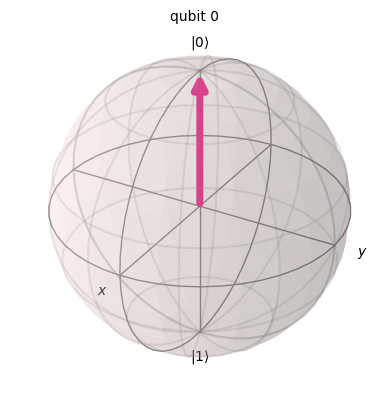

In [148]:
q0.save_statevector()
state = sim.run(q0).result().get_statevector() 
plot_bloch_multivector(state)

 **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.
 
Now that you know how to create and visualise a single qubit, we can start looking at more elaborate circuits. In order to create a quantum circuit, it is necessary to initialise one, or more qubits, and then create some classical bits to store the measument in. Below is an example of a quantum circuit comprising 2 qubits and 2 classical bits:

In [149]:
# Syntax to created the quantum circuit with 2 qubits (first argument), and 2 classical bits (second argument)
circuit = QuantumCircuit(2, 2)    

After creating a circuit, there are two ways you can draw it on your screen to check everything is okay. You can use either of the following ways:

In [150]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [151]:
#circuit.draw(output='mpl')

**Warning!** 

The second method might give you an error. If that is the case, you might need to continue using the first visualisation example as it should run okay (and it is fine to cotinue with this method only). If both work, chose your favourite!

Now you know how to print your circuits and how to check what the state is using the Bloch sphere. But we have not yet made a measurement. In order to do a measurement we use:

In [152]:
circuit.measure(0,0)

This means that the state of the first qubit (first argumet 0) is being recorded into the first classical bit (second argument 0), Note that the other here doesn't really matter, you could equally have `circuit.measure(0,1)` to record the first qubit on the second classical bit and so on... **Remember:** Python starts counting from 0!

You can veryfy this by drawing your circuit: 

In [153]:
#circuit.draw()
#circuit.draw(output='mpl')

We can the execute our circuit (using a local simulator `sim` as defined in the first cell above) and taking the `result()`. We also need to give a name to our output, which here was simply *result*. 

We can also plot the result as a histogram: Also using the function imported from qiskit above. 

A code for executing, storing, and plotting our result is given below:

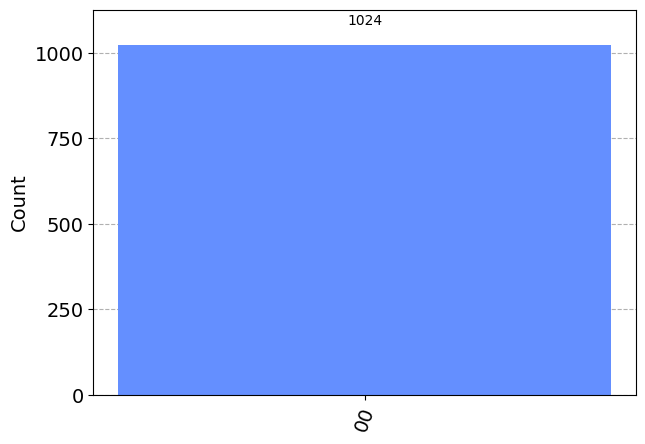

In [154]:
transpiled = transpile(circuit)
result = sim.run(transpiled).result()

plot_histogram(result.get_counts(circuit))

We can see that we (unsurprisingly) have a 100% chance of measuring $|0\rangle$ (every time you run something it will do that operation a certain number of shots (as it is probabilistic). Here, all 1024 shots return the same output!); consistent with that of our Bloch sphere.

## 2. The Pauli Gates <a id="pauli"></a>
You should be familiar with the Pauli gates by now. If any of the maths here is new to you, you should go back to the lecture notes/moodle material to bring yourself up to speed. We will see here that the Pauli matrices can represent some very commonly used quantum gates.

### 2.1 The X-Gate <a id="xgate"></a>
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$





In Qiskit, we can create a short circuit to verify this by applying `.x(0)` to a given qubit. For example, if a qubit initialised as above is called `myqubit` I would need to do `myqubit.x(0)`.

### Task 1:

Initialise a qubit, and apply the X-gate to it. Confirm your result by drawing the circuit and visualing the flipped state using the Block sphere (use/copy and paste the examples above wherever appropriate).

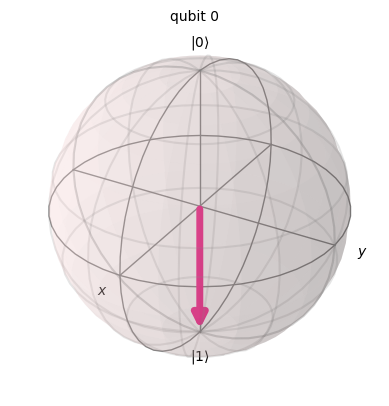

In [155]:
q_x = QuantumCircuit(1)
q_x.x(0)
q_x.save_statevector()
state = sim.run(q_x).result().get_statevector() 
plot_bloch_multivector(state)

### 2.2 The Y & Z-gates  <a id="ynzgatez"></a>
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.

In Qiskit, we can apply the Y and Z-gates to our circuit similar syntax to x: `.y(0)` and `.z(0)`.

### Task 2:

Apply the y and z gates to the qubit above and draw it on your screen.  

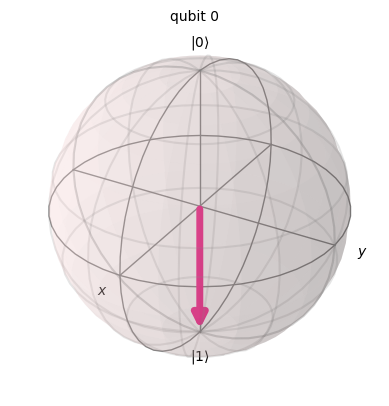

In [156]:
q_yz = QuantumCircuit(1)
q_yz.y(0)
q_yz.z(0)
q_yz.save_statevector()
state = sim.run(q_yz).result().get_statevector() 
plot_bloch_multivector(state)

## 3. The Hadamard Gate  <a id="hgate"></a>

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

You can play around with these gates using the widget below:

### Task 3:

Show mathematically that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate. Then, write a circuit that will show this (you can check each step/rotation, by ploting the new state on the Bloch Sphere each time.


In [157]:
# HZH = 1/sqrt(2)[[1 1][1 -1]]* [[1 0][0 -1]] * 1/sqrt(2)[[1 1][1 -1]] =
# 1/2 [[1 -1][1 1]] * [[1 1][1 -1]]
# 1/2 [[0 2][2 0]] = [[0 1][1 0]] = X

**Warning!** 
When first learning about qubit states, it's easy to confuse the qubits statevector with its Bloch vector. Remember the statevector is the vector $|\psi\rangle$, that holds the amplitudes for the two states our qubit can be in. The Bloch vector is a visualisation tool that maps the 2D, complex statevector onto real, 3D space. So let us have a look at a simple measurement. 

## 4. Multi-Qubit Gates <a id="multi-qubit-gates"></a>

Now we know how to represent the state of a qubit and how to alter those using quantum gates. We are now ready to learn how qubits interact with each other. But first, let us look at how those simple gates can be applied to multiple qubits.

### 4.1 Single Qubit Gates on Multi-Qubit Statevectors <a id="single-qubit-gates"></a>

It may not be clear how an X-gate would act on a qubit in a multi-qubit vector. Fortunately, the rule is quite simple in qiskit; we can just circuit as follows:

In [158]:
qhx = QuantumCircuit(2)
qhx.h(0)
qhx.x(1)
#qhx.draw(output='mpl')

Note how for this is only necessary to cahnge the argument inside the gate. so instead of `.x(0)`, we now have `.x(1)` to indicate the X-gate is acting on the second qubit. Please also note that python starts counting from 0!!! 

### 4.2 The CNOT-Gate <a id="cnot"></a>

An important two-qubit gate is the CNOT-gate. This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is $|1\rangle$. The gate is drawn on a circuit as shwon below, with `q_1` as the control and `q_2` as the target:

In [159]:
qcN = QuantumCircuit(4)
qcN.cx(1,2)
#qcN.draw(output='mpl')

### Task 4:

Build a 2-qubit quantum circuit where the 2 qubits are entangled and measure the output. **Hint:** you know this states from class!

**4(a):** Does this agree with the mathematical prediction? If not, why would you say that is so.



In [160]:
q_ent = QuantumCircuit(2,2)
q_ent.h(0)
q_ent.cx(0,1)
#q_ent.cx(0,1)
#q_ent.h(0)

q_ent.measure([0,1],[0,1])
#q_ent.draw(output='mpl')

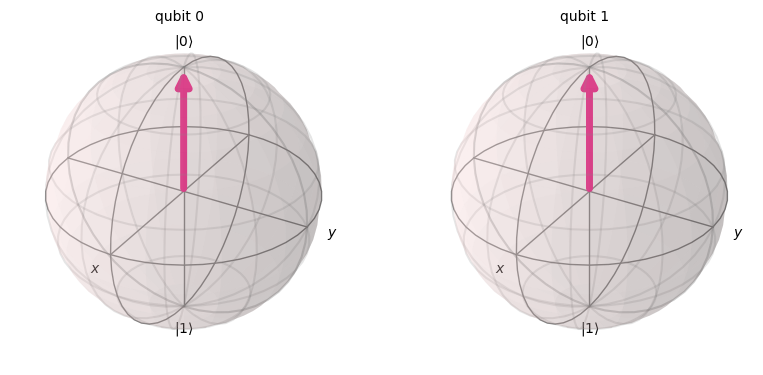

In [161]:
q_ent.save_statevector()
state = sim.run(q_ent).result().get_statevector() 
plot_bloch_multivector(state)

## 5. Test your circuits in a real Quantum Computer!! <a id="IBMpc"></a>

You can test all of the above in a real, IBM Quantum Computer! Isn't that cool? Here is a link:

https://quantum-computing.ibm.com/composer/

In order for this to work, you will need to create an account and sign in, then sending your code to run in one of IBM quantum computers can take a few minuts (or more) as it will be placed in a queue. So be mindful that you might not have time to complete this in the lab, but you should still ask the demonstrators how to do this if you need to during the session.  

### Task 5: 

Use IBM composer and compare its results to what you obtained above. Are they different? How so? 


# Quantum Teleportation (TV) <a id="TV"></a>

In quantum teleportation, the properties of quantum entanglement are used to send a qubit between observers without physically moving the involved qubit. The qubits themselves are not really teleported, but the state of one qubit is destroyed on one side and extracted on the other side, so the information that the state encodes is communicated. The process is not instantaneous, because information must be communicated classically between observers as part of the process. The usefulness of quantum teleportation lies in its ability to send quantum information arbitrarily far distances without exposing quantum states to thermal decoherence from the environment or other adverse effects.

This may sound a bit like science fiction, but quantum teleportation can in principle be used to actually teleport macroscopic objects (in the sense that two objects in exactly the same quantum state are identical). However, the number of entangled states necessary to accomplish this is well outside anything physically achievable, since maintaining such a massive number of entangled states without decohering is a difficult problem!

## The principle <a id="intro2"></a>

James is only 17, he doesn't know anything, but he knows he misses Betty! He wants to apologise to Betty though as he knows she has heard the rummors from Inez. The only way for him to do that is using an entagled state he shares with Betty. So let's helps poor James to send an apology quantum state to Betty! 

Specifically, suppose he wants to send the qubit state
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$. 
This entails passing on information about $\alpha$ and $\beta$ to Betty.

Remember though that there exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that James can't simply generate a copy of $\vert\psi\rangle$ and give the copy to Betty. We can only copy classical states (not superpositions).

However, by taking advantage of two classical bits and an entangled qubit pair, James can transfer his state $\vert\psi\rangle$ to Betty. We call this teleportation because, at the end, Betty will have $\vert\psi\rangle$ and James won't anymore. 

### The set up <a id="set up"></a>

You can either chose to send a $\vert0\rangle$ or a $\vert 1\rangle$, which you should know how to do using what you have done above, or you can chose to send a random, general superposition state. If you chose the latter, here is some information that might help get you stated. 

In [162]:
# package needed to create a random state vector
from qiskit.quantum_info import random_statevector 

# Example Circuit: 
cRand = QuantumCircuit(2,2)

# Initialises the first qubit to |1> by using a Pauli-X gate (remeber qiskit automatically sets states to |0>)
cRand.x(0)                            

# Select a random (but normalised) state
psi = random_statevector(2)   

# Initialise the second qubit into our state psi
cRand.initialize(psi.data, 1)   

# Print the circuit to the screen to check everything is as it should      
#cRand.draw(output='mpl')


We can measure this, and visualise the data in two ways: Hystograms or Block Sphere. Here are the latter

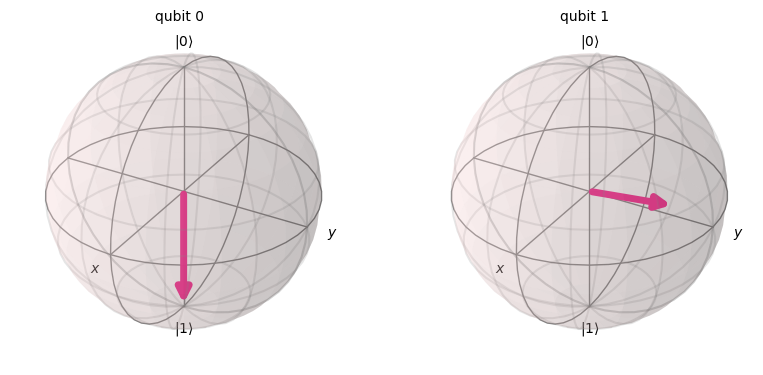

In [163]:
cRand.save_statevector()
out_vector_Rand = sim.run(cRand).result().get_statevector()
plot_bloch_multivector(out_vector_Rand)

To plot the data as histograms, we first need to perform some measurements. This is done as follows:

In [164]:
cRand.measure([0,1],[0,1])
#cRand.draw(output='mpl')

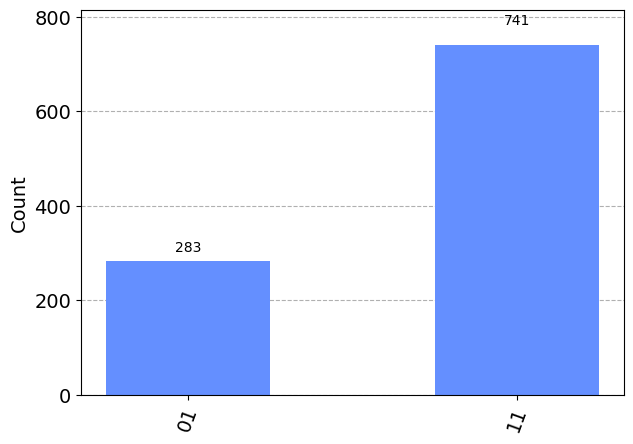

In [165]:
transpiled = transpile(cRand)
result = sim.run(transpiled).result()

plot_histogram(result.get_counts(cRand))

Now, a few comments: 

- there are two numbers on the x axis for each bar (a combination of 0 and 1). They are represent each qubit, and are read from bottom up in the circuit diagram. For example, 01 in the histogram means 0 in the second qubit and 1 in the first qubit. 
- You can print the Bloch spheres after a measurement. This is okay! However, after a measurement the qunatum state will have collapsed and your spheres will only show wither $0\rangle$ or $|1\rangle$

## The Protocol <a id="pauli"></a>

We have seen in class that to transfer a quantum bit (teleport the information from a qubit to another), Alice and Bob must perform the following steps:

#### Step 1

Entangle a qubit pair, 

#### Step 2

James should then perform some operations on his qubit,

#### Step 3

Then send the results to Betty over a classical communication channel, and finally

#### Step 4

Betty then performs some operations on her end to receive James’s qubit.

### Task 6: 

Follow the steps above, plus what you've learnt in class, to create an entanglement protocol. 

### Task 7: Test your circuits in a real Quantum Computer

You should again test all of the above in a real, IBM Quantum Computer!  

Use IBM composer and compare its results to what you obtained above. Are they different? How so?  



In [166]:
from qiskit import QuantumRegister, ClassicalRegister

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])

#circuit.draw(output='mpl')

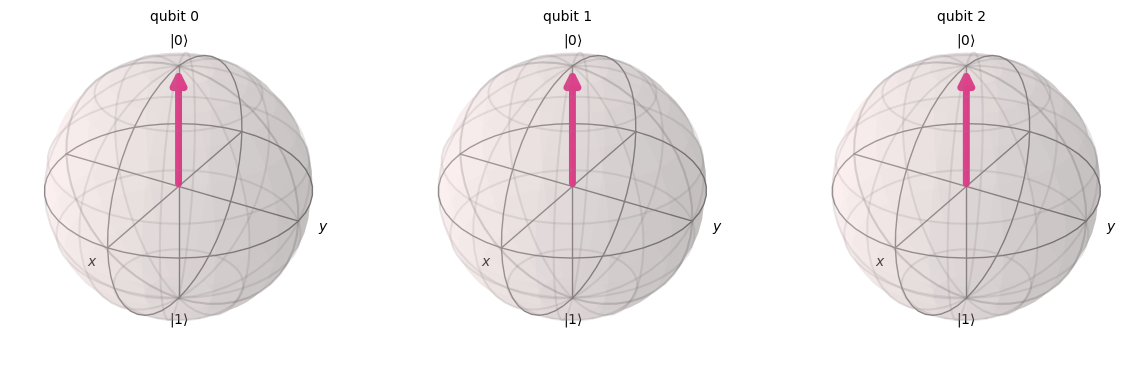

In [167]:
circuit.save_statevector()
out_vector_Rand = sim.run(circuit).result().get_statevector()
plot_bloch_multivector(out_vector_Rand)